### 현재 위치에 따른 광역시도 주유소의 가격 정보 얻어오기
- 사이트에서 제공하는 excel 파일 자동 다운

In [1]:
#필요 패키지 임포트
import selenium
from selenium import webdriver
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from selenium.webdriver.common.by import By # 셀레니움 4.0부터 포함된 함수(필수)

In [32]:
url='https://www.opinet.co.kr/user/main/mainView.do'

In [33]:
driver = webdriver.Chrome('./driver/chromedriver')

C:\Users\TECH4-29\AppData\Local\Temp\ipykernel_13956\4139024571.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


In [34]:
driver.get(url)

In [35]:
# 싼 주유소 찾기 - 지역별 메뉴 추출
xpath = '//*[@id="header"]/div/ul/li[1]/ul/li[1]/a'
menu = driver.find_element(By.XPATH,xpath)

In [36]:
# menu에 대한 스크립트 코드 동작 - 마우스에 반응하는 메뉴이므로
# 해당태그를 찾아서 sub메뉴를 클릭 스크립트 구성
driver.execute_script("arguments[0].click();",menu)

In [26]:
# 시군구 drop-box에 접근
xpath = '//*[@id="SIGUNGU_NM0"]'
gu_list_raw = driver.find_element(By.XPATH,xpath)

In [27]:
gu_list = gu_list_raw.find_elements(By.TAG_NAME,'option')

In [30]:
gu_name = [opt.get_attribute('value') for opt in gu_list]
gu_name.remove('')
gu_name

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [37]:
#
sigungu_sel = driver.find_element(By.ID,'SIGUNGU_NM0')
sigungu_sel.send_keys(gu_name[10])

In [38]:
x_path='//*[@id="searRgSelect"]'
sel_btn = driver.find_element(By.XPATH, x_path)
sel_btn.click()

In [39]:
x_path = '//*[@id="glopopd_excel"]'
excel_btn = driver.find_element(By.XPATH, x_path)
excel_btn.click()

In [40]:
driver.close()

### 시군구별 주유가격 정보 파일 자동 다운로드

In [41]:
#필요 패키지 임포트
import selenium
from selenium import webdriver
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from selenium.webdriver.common.by import By # 셀레니움 4.0부터 포함된 함수(필수)

In [42]:
driver = webdriver.Chrome('./driver/chromedriver')

C:\Users\TECH4-29\AppData\Local\Temp\ipykernel_13956\4139024571.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


In [43]:
url='https://www.opinet.co.kr/user/main/mainView.do'
driver.get(url)

In [44]:
# 싼주유소찾기-지역별 메뉴  추출
# xpath='//*[@id="header"]/div/ul/li[1]/ul/li[1]/a'
xpath='//*[@id="header"]/div/ul/li[1]/ul/li[1]/a'
menu = driver.find_element(By.XPATH,xpath)
# 추출한 메뉴 스크립트 동작
driver.execute_script("arguments[0].click();",menu)

In [45]:
## 전달할 구 list - 위에서 수집한 자료
gu_name

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [46]:
from tqdm import tqdm_notebook
import time

In [47]:
for gu in tqdm_notebook(gu_name) :
    sigungu_sel = driver.find_element(By.ID,'SIGUNGU_NM0')
    sigungu_sel.send_keys(gu)
    time.sleep(1)
    # 조회버튼 클릭
    x_path="""//*[@id="searRgSelect"]"""
    sel_btn = driver.find_element(By.XPATH,x_path)
    sel_btn.click()
    time.sleep(2)
    # 엑셀 저장 버튼 클릭
    x_path='//*[@id="glopopd_excel"]'
    excel_btn = driver.find_element(By.XPATH,x_path)
    excel_btn.click()
    time.sleep(2)

C:\Users\TECH4-29\AppData\Local\Temp\ipykernel_13956\1113466531.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_name) :


  0%|          | 0/25 [00:00<?, ?it/s]

In [48]:
driver.close()

### 서울시 셀프주유소는 일반주유소보다 가격이 싼가?

### 외부 파일 읽어오기
- 이름이 비슷한 같은 형식의 여러파일 읽어오기
- 파일의 이름 정보 추출 패키지 : glob
    - 파일 경로 및 이름을 모아서 리스트에 저장
    - \* 문자 사용 가능
    - ex. 주유소*.xlsx (주유소로 시작하는 모든 xlsx 파일 명 추출)

In [49]:
from glob import glob

In [50]:
# 지정된 디렉터리내의 특정 문자열을 포함하는 파일드르이 파일명을 리스트로 반환
f = glob('./crawl_data/지역_위치별*.xls')

In [52]:
pd.read_excel(f[0], header=2).head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1669,1542,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1684,1595,-
2,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1946,1696,1628,1650
3,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1895,1696,1658,1600
4,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,1879,1699,1655,-


In [54]:
# 수집한 주유 가격 엑셀파일 읽어오기
tmp_raw=[] #임시저장 리스트
for f_name in f : 
    tmp = pd.read_excel(f_name,header=2)
    tmp_raw.append(tmp)

In [57]:
station_raw = pd.concat(tmp_raw)

In [60]:
station_raw.tail()
station_raw.head()
station_raw.shape

(441, 10)

In [61]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      441 non-null    object
 1   상호      441 non-null    object
 2   주소      441 non-null    object
 3   상표      441 non-null    object
 4   전화번호    441 non-null    object
 5   셀프여부    441 non-null    object
 6   고급휘발유   441 non-null    object
 7   휘발유     441 non-null    int64 
 8   경유      441 non-null    int64 
 9   실내등유    441 non-null    object
dtypes: int64(2), object(8)
memory usage: 37.9+ KB


In [62]:
station = pd.DataFrame({'주유소':station_raw['상호'],
                        '주소': station_raw['주소'],
                        '가격': station_raw['휘발유'],
                        '셀프': station_raw['셀프여부'],
                        '상표': station_raw['상표']})

In [63]:
station.tail()

,주유소,주소,가격,셀프,상표
29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2258,N,현대오일뱅크
30,SK논현주유소,서울 강남구 논현로 747 (논현동),2270,N,SK에너지
31,갤러리아주유소,서울 강남구 압구정로 426,2275,N,SK에너지
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2348,N,현대오일뱅크
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스


In [64]:
# 구별 가공데이터 생성
station['구']=[addr.split()[1] for addr in station['주소']]

In [65]:
station.head(2)

,주유소,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1669,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1684,N,현대오일뱅크,강동구


In [66]:
station['가격'].min()

1589

In [68]:
# index 설정
station.reset_index(inplace=True)

In [69]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   441 non-null    int64 
 1   주유소     441 non-null    object
 2   주소      441 non-null    object
 3   가격      441 non-null    int64 
 4   셀프      441 non-null    object
 5   상표      441 non-null    object
 6   구       441 non-null    object
dtypes: int64(2), object(5)
memory usage: 24.2+ KB


In [70]:
# del station['index']

In [71]:
station.head()

,주유소,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1669,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1684,N,현대오일뱅크,강동구
2,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1696,Y,GS칼텍스,강동구
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1696,N,GS칼텍스,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1699,Y,GS칼텍스,강동구


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

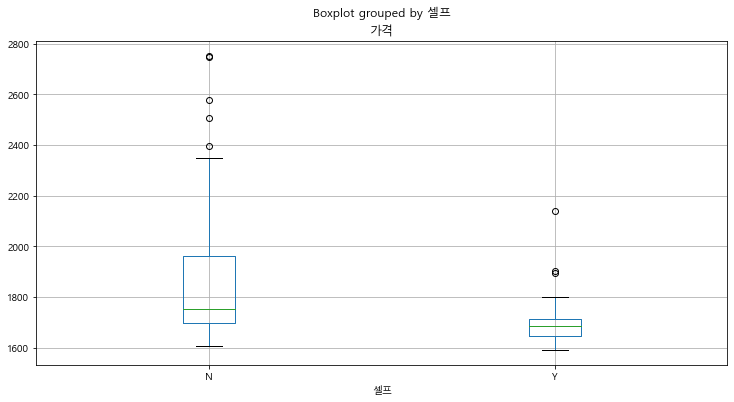

In [73]:
station.boxplot(column='가격',by='셀프',figsize=(12,6))

In [74]:
station.sort_values(by='가격',ascending=False).head(10)

,주유소,주소,가격,셀프,상표,구
272,서남주유소,서울 중구 통일로 30,2753,N,SK에너지,중구
237,서계주유소,서울 용산구 청파로 367 (청파동),2749,N,GS칼텍스,용산구
440,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구
271,필동주유소,서울 중구 퇴계로 196 (필동2가),2509,N,GS칼텍스,중구
236,한석주유소,서울 용산구 이촌로 164,2398,N,SK에너지,용산구
439,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2348,N,현대오일뱅크,강남구
270,약수주유소,서울 중구 다산로 173,2287,N,GS칼텍스,중구
438,갤러리아주유소,서울 강남구 압구정로 426,2275,N,SK에너지,강남구
437,SK논현주유소,서울 강남구 논현로 747 (논현동),2270,N,SK에너지,강남구
262,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2260,N,GS칼텍스,종로구


In [75]:
station.sort_values(by='가격',ascending=True).head(10)

,주유소,주소,가격,셀프,상표,구
65,만남의광장주유소,서울 서초구 양재대로12길 73-71,1589,Y,알뜰(ex),서초구
51,구도일주유소 두꺼비,서울 서대문구 성산로 312,1599,Y,S-OIL,서대문구
238,타이거주유소,서울 은평구 수색로 188 (증산동),1604,Y,SK에너지,은평구
239,응암주유소,서울 은평구 응암로 163,1605,Y,현대오일뱅크,은평구
163,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1605,Y,SK에너지,양천구
164,현대주유소,서울 양천구 남부순환로 372 (신월동),1605,Y,S-OIL,양천구
165,플라트(주)서호주유소,서울 양천구 남부순환로 317,1605,Y,GS칼텍스,양천구
240,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1607,N,현대오일뱅크,은평구
241,㈜오일닷컴 다회주유소,서울 은평구 증산로 441,1609,Y,S-OIL,은평구
166,형산석유(주)원주유소,서울 양천구 남부순환로 408,1615,N,현대오일뱅크,양천구


### 서울시 구별 주유가격 단계 구분도

In [76]:
# 구별 주유가격 평균표 생성
# pivot_table()
gu_data = pd.pivot_table(station, index=['구'], values=['가격'], aggfunc=np.mean)

In [78]:
gu_data

,가격
구,
강남구,1941.058824
강동구,1737.307692
강북구,1653.250000
강서구,1702.848485
관악구,1752.571429
광진구,1687.615385
구로구,1739.700000
금천구,1699.090909
노원구,1702.285714


In [79]:
# 단계구분도 : geodata가 필요 json 파일인 경우가 많다
import json
import folium
import googlemaps

In [80]:
geo_path = './data/02. skorea_municipalities_geo_simple.json'

In [81]:
geo_str = json.load(open(geo_path,encoding='utf-8'))

In [83]:
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

### 파이썬 단계구분도
- folium 패키지의 choropleth() 사용
1. folium.Map(location=[중심위치 위경도], zoom_start=초기 zoom 비율, tiles=지도 형태)함수를 이용해 기본 지도 생성
2. 기본 지도 위에 단계 구분도를 추가
    - choropleth(geo_data=경계위경도가 포함된 json파일,data, columns,fill_color,key_on=)

In [84]:
gu_data.head()

,가격
구,
강남구,1941.058824
강동구,1737.307692
강북구,1653.250000
강서구,1702.848485
관악구,1752.571429


In [85]:
map=folium.Map(location=[37.5502,126.982],zoom_start=10.5,
               tiles='Stamen Toner')

In [87]:
map.choropleth(geo_data=geo_str,
              data=gu_data,
              columns=[gu_data.index,'가격'],
              fill_color='YlGnBu',
              key_on='feature.id')

C:\Users\TECH4-29\AppData\Roaming\Python\Python39\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [88]:
map